#### - Sobhan Moradian Daghigh
#### 
#### - 1/5/2022
#### 
#### - ML - EX03 - Q1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

### Reading data

In [15]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### Ok. Lemme do a group by on the dataset for having 3 classes.

In [17]:
classes = dataset.groupby(by=dataset.iloc[:, -1])
classes.first()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target,,,,,
0.0,5.1,3.5,1.4,0.2,0.0
1.0,7.0,3.2,4.7,1.4,1.0
2.0,6.3,3.3,6.0,2.5,2.0


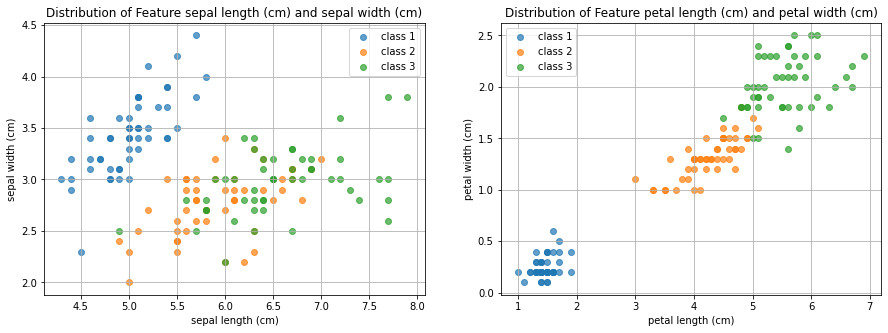

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
figs = [(0, 1), (2, 3)]
for i in range(2):
    for grp, pdf in classes:
        ax[i].scatter(pdf.iloc[:, figs[i][0]], pdf.iloc[:, figs[i][1]], alpha=0.7, label='class {}'.format((int(grp) + 1)))
        ax[i].legend()
        ax[i].grid()
        ax[i].set_title('Distribution of Feature {} and {}'.format(pdf.columns[figs[i][0]], pdf.columns[figs[i][1]]))
        ax[i].set_xlabel('{}'.format(pdf.columns[figs[i][0]]))
        ax[i].set_ylabel('{}'.format(pdf.columns[figs[i][1]]))

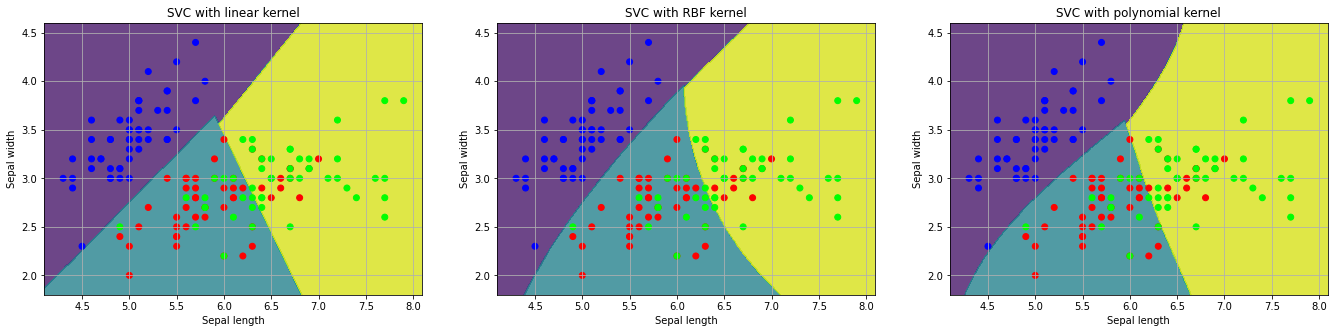

In [127]:
h = .01  # step size in the mesh

X = dataset.iloc[:, :2].values

y = dataset.iloc[:, -1]

C = 1.0

linear_svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']

fig, ax = plt.subplots(1, 3, figsize=(23, 5))
for i, clf in enumerate((linear_svc, poly_svc, rbf_svc)):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.8)


    ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
    ax[i].set_xlabel('Sepal length')
    ax[i].set_ylabel('Sepal width')
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_title(titles[i])
    ax[i].grid()
    
plt.show()